## Naive LR on all selected variables
- Used all selected var from VAR MAP
- Filled NA with mean

In [6]:
import sys, os
DMOL_DIR = "/Users/Henryye/research/shaf/DMOL"
sys.path.append(os.path.join(DMOL_DIR, "utils"))

from ml_utils import *


import numpy as np
import pandas as pd
import math
pd.options.display.max_columns = 999

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../data/class_data.csv")
df_proc = preprocess_df(df, verbose = False)

In [17]:
def get_metrics(y_true, y_pred, k):
    print("MSE:  {}".format(mean_squared_error(y_true, y_pred)))
    print("MAE:  {}".format(mean_absolute_error(y_true, y_pred)))
    R = r2_score(y_true, y_pred)
    n = len(y_true)
    adjR = 1 - (1-R**2)*(n-1) / (n-k-1)
    print("r-squared:  {}".format(R))
#     print("Adjusted r-squared:  {}".format(adjR))
    
def plot_results(y_true, y_pred):
    plt.figure(figsize = (8, 3))
    plt.scatter(y_true, y_pred)
    plt.plot(np.linspace(min(y_true), max(y_true)), np.linspace(min(y_true), max(y_true)), '-r')
    plt.xlabel("y true", fontsize = 12)
    plt.ylabel("y pred", fontsize = 12)
    plt.show()
    
def construct_X(df, var_map_curr, n_comp = None, verbose = False):
    X = pd.DataFrame()
    pca = PCA(n_components=n_comp) if n_comp is not None else None
    for construct in var_map_curr["Quant"]:
        temp = df[var_map_curr["Quant"][construct]].copy()
        temp = temp.fillna(temp.mode().iloc[0])
        if n_comp is None:
            temp_mean = pd.DataFrame(temp.mean(axis=1))
            temp_mean.columns = ["{}_mean".format(construct)]
            X = pd.concat([X, temp_mean], axis = 1)
        else:
            if len(var_map_curr["Quant"][construct]) < n_comp:
                X = pd.concat([X, temp.copy()], axis = 1)
            else:
                temp_pca = pd.DataFrame(pca.fit_transform(temp))
                temp_pca.columns = ["{}_PC{}".format(construct, i) for i in range(1, n_comp+1)]
                X = pd.concat([X, temp_pca], axis = 1)
                pca_coeff_df = pd.DataFrame(pca.components_)
                pca_coeff_df.columns = list(var_map_curr["Quant"][construct])
                pca_coeff_df.index = ["PC {}".format(i) for i in range(1, n_comp+1)]
                display(pca_coeff_df)
                if verbose:
                    print("{} variance explained:\n{}\n".format(construct, pca.explained_variance_ratio_))
    return X

def train_model(df, week_num, n_comp = None, use_fr = False, plot = False, verbose = False):
    var_map_curr = NEW_VAR_MAP["week_{}".format(week_num)]
    X, y = construct_X(df, var_map_curr, n_comp, verbose), df["gr_revq{}".format(week_num)]
    for gr in ["gr_revq{}".format(i) for i in range(max(1, week_num-1), week_num)]:
        X[gr] = df[gr]
    print(X.shape)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#     reg = LinearRegression().fit(X_train, y_train)
    reg = Lasso(alpha=0.5).fit(X_train, y_train)
    print("Training Score:  ")
    y_train_pred = reg.predict(X_train)
    get_metrics(y_train, y_train_pred, X_train.shape[1])
    print('\n')
    print("Testing Score:   ")
    y_test_pred = reg.predict(X_test)
    get_metrics(y_test, y_test_pred, X_test.shape[1])
    
    if plot:
        print("Training plots:  ")
        plot_results(y_train, y_train_pred)
        print("Testing plots：  ")
        plot_results(y_test, y_test_pred)

Week 1
(99, 21)
Training Score:  
MSE:  22.858340677813466
MAE:  3.428358148644369
r-squared:  0.24876827714463468


Testing Score:   
MSE:  32.41447545326601
MAE:  4.362990869205855
r-squared:  -0.05147921347063544
Training plots:  


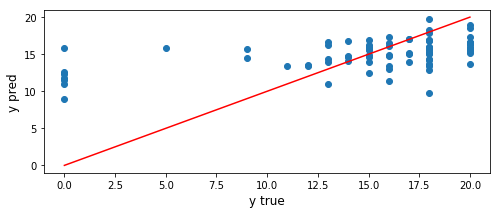

Testing plots：  


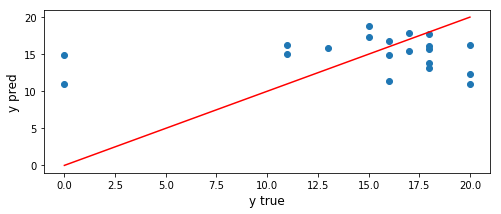




Week 2
(99, 16)
Training Score:  
MSE:  23.01927937668859
MAE:  3.256610834650382
r-squared:  0.3089388392311557


Testing Score:   
MSE:  34.01654718569748
MAE:  4.089362176689788
r-squared:  0.20055118247479475
Training plots:  


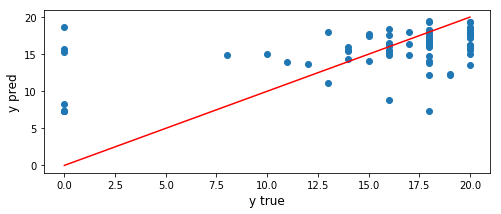

Testing plots：  


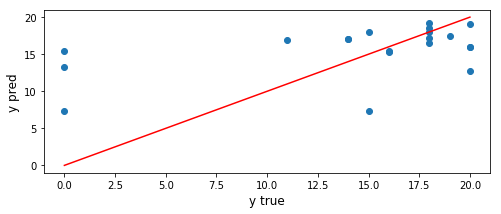




Week 3
(99, 15)
Training Score:  
MSE:  11.105409697357985
MAE:  2.540066482613028
r-squared:  0.6226692766781112


Testing Score:   
MSE:  41.55987826464713
MAE:  4.4823244936135564
r-squared:  0.01610136684074026
Training plots:  


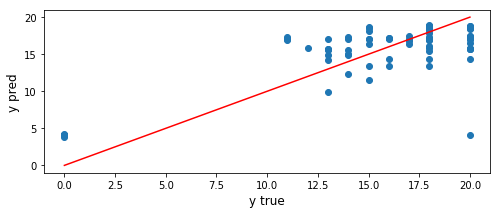

Testing plots：  


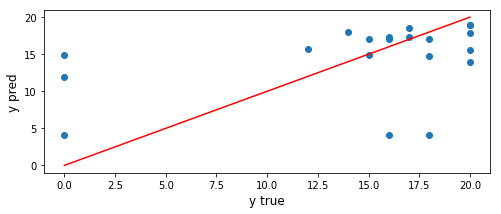




Week 4
(99, 17)
Training Score:  
MSE:  9.95146720646698
MAE:  2.437772627524034
r-squared:  0.6893153371840464


Testing Score:   
MSE:  34.71606923355292
MAE:  3.975580699930449
r-squared:  0.032641748977975005
Training plots:  


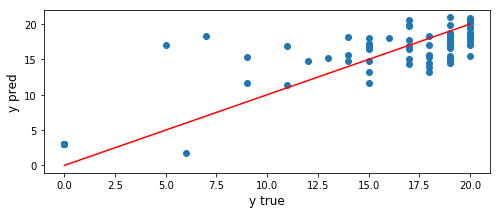

Testing plots：  


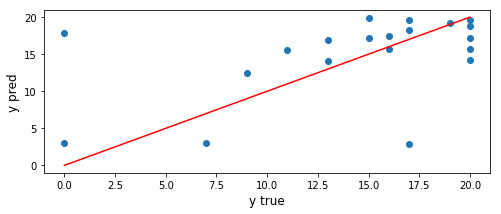




Week 5
(99, 16)
Training Score:  
MSE:  15.03667075700051
MAE:  2.425601340356312
r-squared:  0.6388842884403083


Testing Score:   
MSE:  29.194196655116276
MAE:  3.740229641331813
r-squared:  0.40794571780336086
Training plots:  


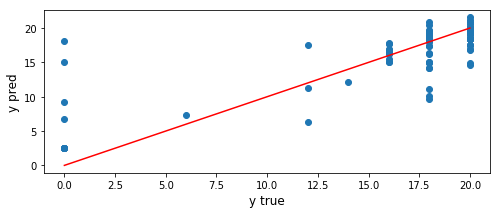

Testing plots：  


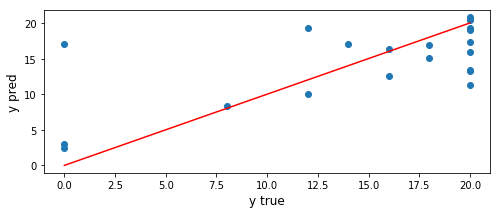

In [18]:
# using the mean
for week_num in range(1, 6):
    print("Week {}".format(week_num))
    train_model(df_proc, week_num, use_fr = False, plot = True, verbose = True)
    print('\n\n')

Week 1


,pre_er4,pre_er1,pre_er7x,pre_er3,pre_er2,pre_er8x
PC 1,-0.466354,0.296450,-0.447115,0.403775,-0.380186,-0.432601
PC 2,-0.189667,-0.642650,-0.353197,-0.569953,-0.274367,-0.161729
PC 3,-0.762552,0.067954,0.366344,-0.124083,-0.137808,0.495278
PC 4,-0.144741,0.493784,-0.478678,-0.483856,0.514476,0.085394
PC 5,-0.137694,0.183055,0.557646,-0.349504,0.093737,-0.711071


Effort Regulation variance explained:
[0.51532837 0.20068421 0.09847981 0.07815909 0.0671039 ]



,pre_iemot1,pre_iemot5,pre_iemot3,pre_iemot2,pre_iemot4,pre_iemot7,pre_iemot6
PC 1,-0.353561,-0.437437,-0.348059,-0.394544,-0.306957,-0.411811,-0.378183
PC 2,0.460045,-0.044835,0.503532,0.243271,-0.114745,-0.518769,-0.437419
PC 3,-0.194307,0.044947,0.001978,0.481936,-0.724397,0.395041,-0.217142
PC 4,0.433591,-0.559904,0.267132,-0.397986,-0.275226,0.378794,0.222532
PC 5,0.053186,0.678475,0.162926,-0.621623,-0.284848,0.079199,-0.190976


Internal/External Motivation variance explained:
[0.45190891 0.25270204 0.09972126 0.07703855 0.05760133]



,pre_orsh4,pre_olsrl3,pre_orsh5,pre_olsrl4,pre_orsh3,pre_orsh1,pre_olsrl2,pre_orsh6,pre_olsrl1,pre_orsh2,pre_orsh7,pre_olsrl5
PC 1,-0.019996,0.458553,-0.050857,0.517379,-0.058967,-0.134914,0.497014,-0.111039,-0.207228,-0.124851,-0.040660,0.421718
PC 2,-0.263959,-0.262856,-0.227498,-0.065506,-0.291831,-0.269071,0.056742,-0.377179,-0.418098,-0.252136,-0.425266,-0.287938
PC 3,-0.233057,0.460057,-0.137395,-0.407921,-0.270122,0.204867,-0.104715,-0.137343,0.461286,-0.246040,-0.291843,0.213303
PC 4,-0.313182,0.424128,-0.026355,-0.140998,0.004024,0.095039,0.359569,0.060198,-0.080438,0.457878,0.098470,-0.577648
PC 5,-0.251921,-0.080041,-0.220865,-0.219632,-0.369452,0.153273,-0.174282,0.065000,-0.428743,0.364564,0.323185,0.466205


Online Self Regulation variance explained:
[0.39059771 0.16848129 0.08591681 0.07046449 0.06260405]



,pre_latitude,pre_duration,pre_progress,pre_longitude,pre_finished
PC 1,-0.000006,1.000000e+00,0.0,-7.196128e-08,0.0
PC 2,-0.018019,-4.441161e-08,-0.0,9.998376e-01,-0.0
PC 3,0.999838,6.457982e-06,0.0,1.801889e-02,-0.0
PC 4,0.000000,0.000000e+00,0.0,0.000000e+00,1.0
PC 5,-0.000000,-0.000000e+00,1.0,-0.000000e+00,-0.0


Qualtrics Embedded Data variance explained:
[9.99997977e-01 2.01955002e-06 3.84607221e-09 0.00000000e+00
 0.00000000e+00]



,pre_se1,pre_se4,pre_se5,pre_se2,pre_se3
PC 1,-0.457358,-0.472852,-0.468598,-0.461326,-0.367190
PC 2,-0.582709,0.310979,0.384741,-0.477077,0.433722
PC 3,0.392192,-0.449572,-0.209879,-0.287374,0.719331
PC 4,0.538701,0.355935,0.050058,-0.686392,-0.330865
PC 5,-0.085212,0.592367,-0.765399,0.076536,0.223936


Self-Efficacy variance explained:
[0.79559694 0.08932638 0.0496603  0.04031406 0.02510232]



,pre_util1,pre_util2,pre_util3,pre_util4,pre_util5
PC 1,-0.475579,-0.522883,-0.496001,-0.461809,-0.202811
PC 2,0.200008,0.287863,0.053486,-0.187018,-0.916131
PC 3,0.343165,0.105791,0.233309,-0.853788,0.296073
PC 4,-0.000254,-0.664738,0.723662,0.053682,-0.177636
PC 5,0.784894,-0.436645,-0.415936,0.141143,-0.018941


Utility Value variance explained:
[0.64466999 0.16054666 0.11052044 0.05678174 0.02748116]

(99, 68)
Training Score:  
MSE:  17.921805586567345
MAE:  3.0852478837721256
r-squared:  0.4110058522076524


Testing Score:   
MSE:  28.31022891825207
MAE:  4.079837263730144
r-squared:  0.0816566728326309
Training plots:  


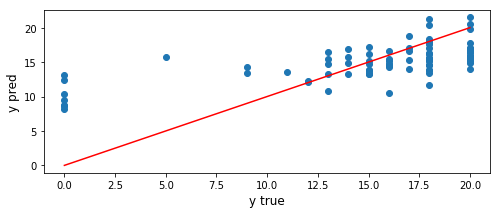

Testing plots：  


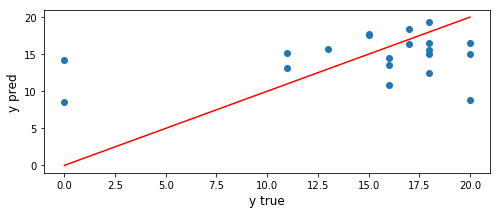




Week 2


,iemot1w2,iemot7w2,iemot5w2,iemot2w2,iemot3w2,iemot4w2
PC 1,-0.415039,-0.480413,-0.439554,-0.464072,-0.411280,-0.138655
PC 2,-0.431695,0.680249,0.287449,-0.277406,-0.407088,0.159997
PC 3,0.059075,0.434172,-0.380290,0.082362,0.019830,-0.810066
PC 4,0.170896,0.182985,-0.146450,-0.752343,0.579790,0.116989
PC 5,0.000807,-0.286629,0.746915,-0.276670,0.027158,-0.531674


Internal/External Motivation variance explained:
[0.55629409 0.24299942 0.07893263 0.05198011 0.04801806]

(99, 38)
Training Score:  
MSE:  19.66659158073211
MAE:  3.197049286358504
r-squared:  0.4095897884661496


Testing Score:   
MSE:  37.300690323181996
MAE:  4.3892067376782515
r-squared:  0.12336803000747376
Training plots:  


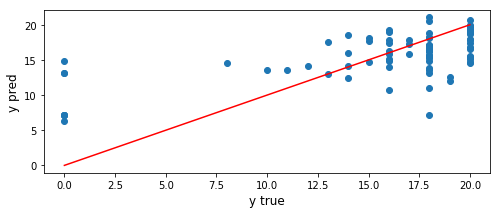

Testing plots：  


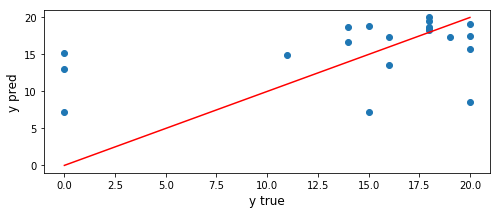




Week 3


,iemot1w3,iemot5w3,iemot2w3,iemot7w3,iemot4w3,iemot3w3
PC 1,-0.391228,-0.371385,-0.475006,-0.507446,-0.142830,-0.453300
PC 2,0.459081,-0.273565,0.158075,-0.680398,-0.117853,0.461073
PC 3,-0.056894,-0.161610,0.378227,0.176335,-0.882315,-0.134220
PC 4,-0.376466,0.381552,0.654216,-0.444555,0.181391,-0.232728
PC 5,-0.149951,-0.784550,0.409431,0.225012,0.378095,-0.027867


Internal/External Motivation variance explained:
[0.53874758 0.22835896 0.09441929 0.07272024 0.04475191]

(99, 35)
Training Score:  
MSE:  10.7325360267609
MAE:  2.4494519639837926
r-squared:  0.6353384798564107


Testing Score:   
MSE:  41.67151081139573
MAE:  4.551401360103509
r-squared:  0.013458550866578323
Training plots:  


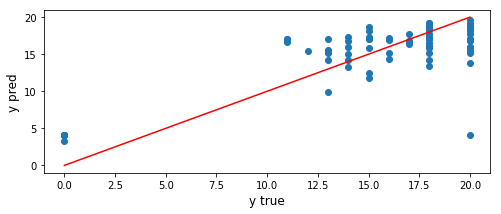

Testing plots：  


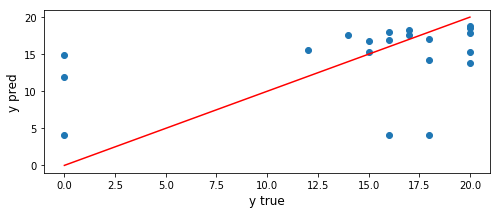




Week 4


,iemot2w4,iemot7w4,iemot4w4,iemot3w4,iemot1w4,iemot5w4
PC 1,-0.489318,-0.431584,-0.230875,-0.427440,-0.446194,-0.373102
PC 2,0.236847,-0.735992,0.088146,0.339467,0.384460,-0.362495
PC 3,0.068282,0.185696,-0.925780,0.186308,0.194166,-0.177127
PC 4,-0.656490,-0.248101,-0.101327,0.186973,0.341774,0.587735
PC 5,0.518313,-0.411905,-0.265484,-0.327506,-0.207187,0.583968


Internal/External Motivation variance explained:
[0.60014628 0.20688934 0.08210959 0.05119709 0.04362082]

(99, 39)
Training Score:  
MSE:  8.179811558132716
MAE:  2.220485850446584
r-squared:  0.7446264010009491


Testing Score:   
MSE:  30.622939108521404
MAE:  3.6865123490476983
r-squared:  0.146696228254367
Training plots:  


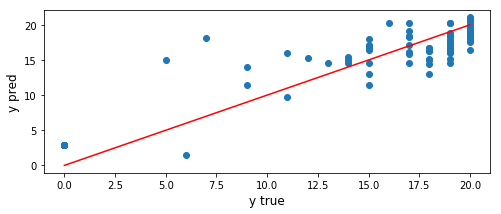

Testing plots：  


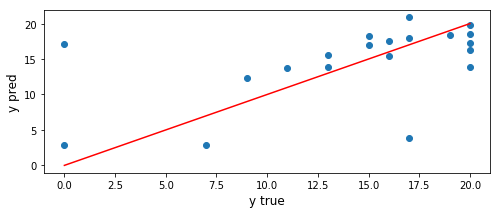




Week 5


,iemot7w5,iemot5w5,iemot3w5,iemot2w5,iemot1w5,iemot4w5
PC 1,-0.459092,-0.409250,-0.405585,-0.476744,-0.432209,-0.207749
PC 2,0.624064,0.340037,-0.421215,-0.199683,-0.476955,0.223913
PC 3,0.372003,-0.153204,-0.185927,0.279814,0.024930,-0.851267
PC 4,-0.419133,0.823199,0.022528,-0.051147,-0.127499,-0.356780
PC 5,-0.284274,-0.036411,-0.375053,0.800020,-0.299074,0.218452


Internal/External Motivation variance explained:
[0.61342774 0.20260267 0.0880567  0.03956087 0.03752524]

(99, 38)
Training Score:  
MSE:  12.644214163926197
MAE:  2.2358047946067217
r-squared:  0.6963407346806758


Testing Score:   
MSE:  25.394490170992768
MAE:  3.331081870039088
r-squared:  0.48500324131022576
Training plots:  


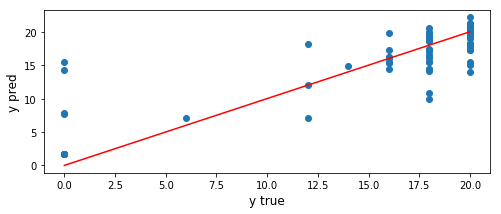

Testing plots：  


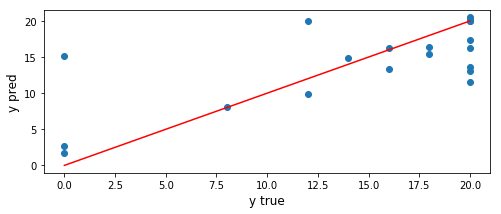

In [20]:
# using 3 PC: can see after the third principal, the var explained is very small
for week_num in range(1, 6):
    print("Week {}".format(week_num))
    train_model(df_proc, week_num, n_comp=5, use_fr = False, plot = True, verbose = True)
    print('\n\n')